In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

[91, 2, 40, 93, 42, 32, 34, 74, 66, 7, 39, 73, 46, 11, 18, 57, 29, 75, 86, 3, 60, 89, 63, 48, 51, 10, 99, 61, 8, 59, 69, 67, 27, 35, 94, 62, 28, 55, 90, 83, 44, 72, 26, 15, 98, 41, 12, 38, 53, 50, 91, 2, 40, 93, 42, 32, 34, 74, 66, 7, 39, 73, 46, 11, 18, 57, 29, 75, 86, 3, 60, 89, 63, 48, 51, 10, 99, 61, 8, 59, 69, 67, 27, 35, 94, 62, 28, 55, 90, 83, 44, 72, 26, 15, 98, 41, 12, 38, 53, 50]


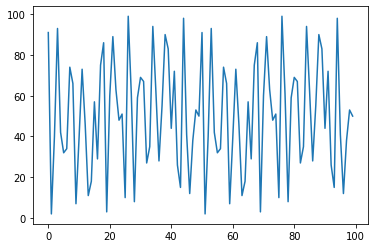

In [ ]:
# 1. Multiplicative Congruential Generator.
# we say A Congruential B mod N, when (A-B) is divisible by N.
class RandomGenerator:
  def __init__(self, low=0, up=float("inf"), a=5, b=2):
    self.a = a
    self.up = up+1
    self.low = low
    if(up!=float('inf')):
      self.last = (up + low)//2
    else:
      self.last = low+73
    

  def getRand(self):
    next = (self.a * self.last) % self.up
    if(next < self.low):
      next = next + self.low
    
    self.last = next
    return next

g = RandomGenerator(0, 100, a=20)
randoms = []
for i in range(100):
  randoms.append(g.getRand())
print(randoms)
plt.plot(randoms)
plt.show()

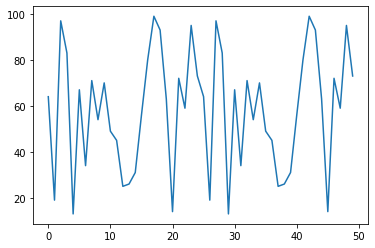

In [ ]:
# 2. Linear/ Mixed Congruential Generator.
# we say A Congruential B mod N, when (A-B) is divisible by N.
class RandomGenerator:
  def __init__(self, low=0, up=float("inf"), a=5, b=2):
    self.a = a
    self.b = b
    self.up = up+1
    self.low = low
    self.last = 73
    # self.last = (up==float("inf")) if 74 else (low+up) // 2

  def getRand(self):
    next = ((self.a * self.last) + self.b) % self.up
    if(next < self.low):
      next = next + self.low
    
    self.last = next
    return next

g = RandomGenerator(0, 100)
randoms = []
for i in range(50):
  randoms.append(g.getRand())
# print(randoms)
plt.plot(randoms)
plt.show()

In [ ]:
# 3: Generate first 15 random numbers using equation,
#       x(n) = (3 * x(n-1) + 5 * x(n-2)) modulo 100 where n >= 3.
# x(1) = 23, x(2) = 66
x1 = 23
x2 = 66
mean = 0
for i in range(15):
  next = ((3 * x2) + (5 * x1)) % 100
  x1 = x2
  x2 = next
  mean = mean + next
  print(next)

mean = mean / 15
print(mean)

13
69
72
61
43
34
17
21
48
49
87
6
53
89
32
46.266666666666666


In [ ]:
# 4: correlation
# to calculate Y array.
def getY(i):
  ans = i**2
  ans = 1 - ans
  return ans ** (1/2)

# taking 10 values uniformly distributed between 0 and 1.
x = [random.uniform(0, 1) for i in range(10)]
y = list(map(getY, x))

# finding correlation matrix and taking coorelation between x and y=(1-x^2)^(1/2).
corr = np.corrcoef(x, y)[0][1]
print(corr)


# taking 10 values uniformly distributed between 0 and 1.
x = [random.uniform(0, 1) for i in range(10)]
x1 = [i**2 for i in x]
y = list(map(getY, x))

# finding correlation matrix and taking coorelation between x=u^2 and y = (1-u^2)^(1/2).
corr = np.corrcoef(x1, y)[0][1]
print(corr)

-0.9126032840896264
-0.9896421676972007


In [ ]:
# 5: Expectations
def getMean(nums):
  sum = 0
  for i in nums:
    sum += i
  return sum/len(nums)

nums = [10, 100, 1000, 10000]
for i in nums:
  randoms = []
  for j in range(i):
    sum = 0
    n=0
    while sum < 1:
      uniform = random.uniform(0, 1)
      sum = sum + uniform
      n+=1
    randoms.append(n-1)
  print(getMean(randoms))

# Observation: For different values of N we can see that mean remains almost
# constant, which basically means it takes minimum ~2 random numbers from Uniform
# distribution (0, 1) to add up to 1, on an average even when the number of observations are 
# increased expected value (aka mean) remains the same.

1.4
1.67
1.753
1.7088


In [ ]:
# 6: Expectation & Probability
def generateNums(size):
  res = []
  for i in range(size):
    prod = 1
    cnt = 0
    while(prod >= np.exp(-3)):
      prod = prod * random.uniform(0, 1)
      cnt+=1
    res.append(cnt-1)
  return res

def getExpectation(values, weights):
  exp = 0;
  for i in range(len(values)):
    exp = exp + (values[i] * weights[i])
  return exp
    
size = 12
vals = generateNums(size)
weights = [(vals.count(i)/len(vals)) for i in vals]

print("Expected Value:", getExpectation(vals, weights))
for i in range(7):
  print(vals.count(i)/len(vals), end=" ")

Expected Value: 9.0
0.0 0.16666666666666666 0.16666666666666666 0.4166666666666667 0.16666666666666666 0.08333333333333333 0.0 

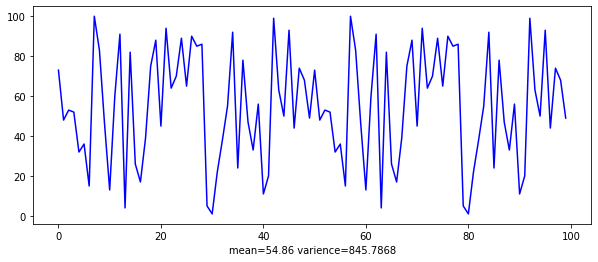

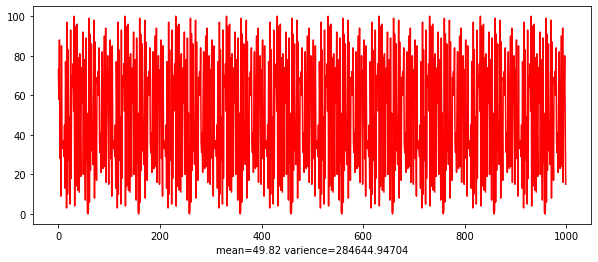

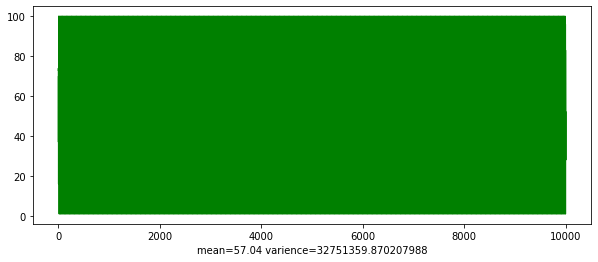

In [ ]:
# 7: Plotting Random Numbers
nums = [100, 1000, 10000]
colors = ['blue', 'red', 'green']
j=0;
for i in nums:
  g = RandomGenerator(low=0, up=100, a=i//5)
  l = g.last
  randoms = [l]
  fig = plt.figure()
  fig.set_figwidth(10)
  mean = l
  for k in range(i-1):
    r = g.getRand()
    mean = mean + r;
    randoms.append(r)
  mean = mean/i
  var = (l-mean)**2
  for k in range(i-1):
    var = var + (k-mean)**2
  var = var/i
  label = 'mean=' + str(mean) + ' varience=' + str(var)
  plt.xlabel(label)
  plt.plot(randoms, color=colors[j])
  j = j + 1
  plt.show()